### Sentiment Analysis
In this notebook, we will look into sentiment analysis to visualize and quantify the public opinion towards two topics.

Let's start by grabbing tweets using the functions we wrote last time.

In [82]:
%matplotlib inline
import pandas as pd
import twitter_helpers.authentication as twit_auth
from twitter_helpers.scraping import scrape_tweets

twitter_api = twit_auth.authenticate_twitter()

obama = scrape_tweets("food", 2000)
trump = scrape_tweets("politics", 2000)

Getting tweets 0 to 100
Getting tweets 100 to 200
Getting tweets 200 to 300
Getting tweets 300 to 400
Getting tweets 400 to 500
Getting tweets 500 to 600
Getting tweets 600 to 700
Getting tweets 700 to 800
Getting tweets 800 to 900
Getting tweets 900 to 1000
Getting tweets 1000 to 1100
Getting tweets 1100 to 1200
Getting tweets 1200 to 1300
Getting tweets 1300 to 1400
Getting tweets 1400 to 1500
Getting tweets 1500 to 1600
Getting tweets 1600 to 1700
Getting tweets 1700 to 1800
Getting tweets 0 to 100
Getting tweets 100 to 200
Getting tweets 200 to 300
Getting tweets 300 to 400
Getting tweets 400 to 500
Getting tweets 500 to 600
Getting tweets 600 to 700
Getting tweets 700 to 800
Getting tweets 800 to 900
Getting tweets 900 to 1000
Getting tweets 1000 to 1100
Getting tweets 1100 to 1200
Getting tweets 1200 to 1300
Getting tweets 1300 to 1400
Getting tweets 1400 to 1500
Getting tweets 1500 to 1600
Getting tweets 1600 to 1700
Getting tweets 1700 to 1800
Getting tweets 1800 to 1900
Gettin

#### NLTK

Now we'll tokenize and categorize our tweets using the bag of words model, counting the number of words that fall in neutral, negative, and negative.

In [83]:
from nltk.tokenize import word_tokenize
from nltk.corpus import opinion_lexicon # use nltk.download() to download this package first

To begin, we must split up the text strings that we scraped from twitter - this process is known as tokenization. The simplest form of tokenization is splitting by spaces in the string, but more advanced tokenization methods can do additional operations such as tag words with their part of speech (noun, verb, etc...).

In [84]:
obama_tweets = obama['text'].apply(word_tokenize)
trump_tweets = trump['text'].apply(word_tokenize)

In [85]:
obama_tweets[0]

['RT',
 '@',
 'PepengPacool',
 ':',
 'Money',
 'ca',
 "n't",
 'buy',
 'happiness',
 '?',
 'Nah',
 '.',
 'My',
 'happiness',
 'is',
 'food',
 'and',
 'money',
 'is',
 'used',
 'to',
 'buy',
 'food',
 '.']

In [86]:
def sentiment_classifier(documents):
    """
    Input: Iterable of tokenized documents to be analyzed for sentiment
    Output: Pandas dataframe with counts (or proportions?) of
            positive, negative, and neutral sentiments
    """
    classified_words = {'positive':[], 'negative':[], 'neutral':[]}
    
    lexicon_positive = {word for word in list(opinion_lexicon.positive())}  # very important for performance - 
    lexicon_negative = {word for word in list(opinion_lexicon.negative())}  # convert to set for O(1) lookups. 4 OoM reduction in operations
    
    for i,doc in enumerate(documents):
        positive = 0
        negative = 0
        neutral = 0
        
        for word in doc:
            if word in lexicon_positive:
                positive += 1
            elif word in lexicon_negative:
                negative += 1
            else:
                neutral += 1
        
        classified_words['positive'].append(positive)
        classified_words['negative'].append(negative)
        classified_words['neutral'].append(neutral)
        
    return pd.DataFrame(classified_words)

http://stackoverflow.com/questions/4867197/failed-loading-english-pickle-with-nltk-data-load

In [87]:
sentiment_classifier(obama_tweets)

,negative,neutral,positive
0,0,22,2
1,0,29,0
2,0,21,0
3,2,24,0
4,1,30,1
5,0,16,1
6,0,20,0
7,0,18,2
8,0,29,1
9,0,7,0


In [88]:
obama = pd.concat([obama, sentiment_classifier(obama_tweets)], axis=1)
trump = pd.concat([trump, sentiment_classifier(trump_tweets)], axis=1)

In [89]:
obama['positive_prop'] = obama.positive / (obama.positive + obama.negative + obama.neutral)
obama['negative_prop'] = obama.negative / (obama.positive + obama.negative + obama.neutral)

In [90]:
trump['positive_prop'] = trump.positive / (trump.positive + trump.negative + trump.neutral)
trump['negative_prop'] = trump.negative / (trump.positive + trump.negative + trump.neutral)

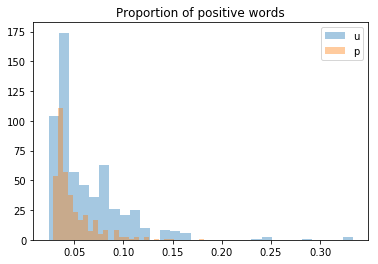

In [95]:
from matplotlib import pyplot
obama_positive = obama.positive_prop[obama.positive_prop != 0]
trump_positive = trump.positive_prop[trump.positive_prop != 0]

pyplot.hist(obama_positive, alpha=.4, bins=30)
pyplot.hist(trump_positive, alpha=.4, bins=30)
pyplot.legend('upper right')
pyplot.title("Proportion of positive words")

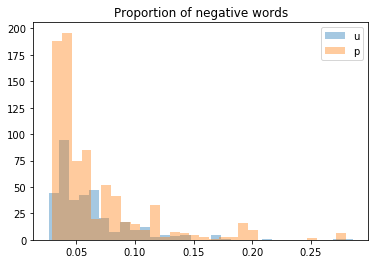

In [92]:
from matplotlib import pyplot
obama_negative = obama.negative_prop[obama.negative_prop != 0]
trump_negative = trump.negative_prop[trump.negative_prop != 0]

pyplot.hist(obama_negative, alpha=.4, bins=30)
pyplot.hist(trump_negative, alpha=.4, bins=30)
pyplot.legend('upper right')
pyplot.title("Proportion of negative words")